Link list help avoid 3 disadvantage of list adt:
*  The length of a dynamic array might be longer than the actual number of
elements that it stores.
* Amortized bounds for operations may be unacceptable in real-time systems.
* Insertions and deletions at interior positions of an array are expensive.

# Singly Linked List
First and last node of a linked list are known as the **head** and **tail** of the
list.  
Starting at the head, and moving from one node to another by following each node’s next reference, we can reach the tail of the list. Tail is the node having None as its next reference.  
Next reference of a node can be viewed as a **link** or **pointer** to another node, the process of traversing a list is also known as **link hopping** or **pointer hopping**.  
Tail can be reach from head but such traversal is inconvinient so one can store an explicit reference to the tail.  
In similar regard, we should store the number of nodes in the list instance

In [0]:
"""Singly linked list"""
class Empty(Exception):
  """Error attempting to access an element from an empty container."""
  pass

class _Node:
  __slots__ = '_element','_next'

  def __init__(self,element,next):
    self._element = element
    self._next = next

In [0]:
"""Linked Stack"""
class LinkedStack:
  class _Node:
    __slots__='_element','_next'

    def __init__(self,element,next):
      self._element=element
      self._next = next


  def __init__(self):
    self._head = None
    self._size = 0

  def __len__(self):
    return self._size

  def is_empty(self):
    return self._size ==0

  def push(self,e):
    self._head = self.Node(e,self._head)
    self._size+=1

  def top(self):
    if self.is_empty():
      raise Empty('Stack is empty')
    return self._head._element

  def pop(self):
    if self.is_empty():
      raise Empty('Stack is empty')
    answer = self._head._element
    self._head = self._head._next
    self.size -= 1
    return a


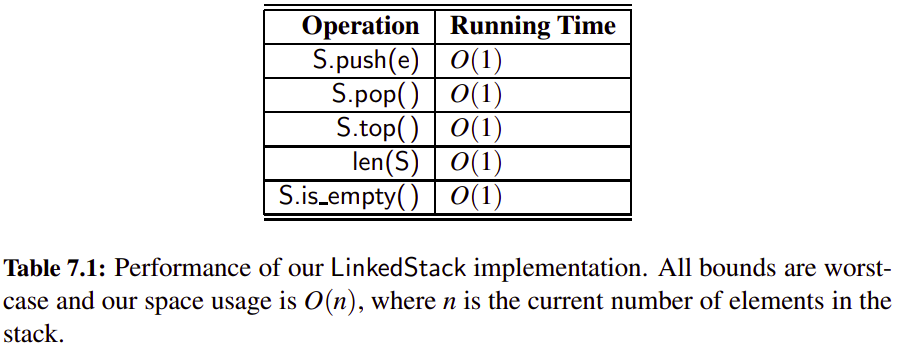

In [0]:
"""Circularly linked list"""
class CircularQueue:
  class Node:
    __slot__ = '_next','_element'
    def __init__(self,element,next):
      self._element = element
      self._next = next
  def __init__(self):
    self._tail = None
    self._size = 0
  
  def __len__(self):
    return self._size

  def is_empty(self):
    return self._size ==0

  def first(self):
    if self.is_empty():
      raise Empty('Queue is empty')
    return self._head._element

  def enqueue(self,element):
    newest = self.Node(element,None)
    if self.is_empty():
      newest._next = newest
    else:
      newest._next = self._tail._next
      self._tail._next = newest
    self._tail = newest
    self._size +=1

  def dequeue(self,element):
    if self.is_empty():
      raise Empty('Queue is empty')
    oldhead = self._tail._next
    answer = oldhead._element
    size -= 1
    if self.is_empty():
      self._tail = None
    else:
      self._tail._next = oldhead._next
    return answer

  def rotate(self):
    if self._size > 0:
      self._tail = self._tail._next 

Singly linked list has disadvantages bc of its asymetric property. We can add new element to the tail and remove first element but we can't do the reserve.  
==> Doubly linked list
* Greater $O(1)$ update time operation including insertion and deletion abitrary position within the list

#Advantage of using sentinel(guard)
Head & tail not change, only nodes btween them change --> not required additional condition in enqueue (e.g LinkedQueue)


In [0]:
"""DoublyQueue"""
class _DoublyQueueBase:
  class Node:
    __slots__ = '_next','_element','_prev'
    def __init__(self,element,prev,next):
      self._element = element
      self._next = next
      self._prev = prev
  def __init__(self):
    self._header = self.Node(None,None,None)
    self._trailer = self.Node(None,None,None)
    self._size = 0
    self._header._next = self._trailer
    self._trailer._prev = self._header
  
  def __len__(self):
    return self._size

  def is_empty(self):
    return self._size ==0

  def insert_between(self,element, predecessor, successor):
    newest = self.Node(element,predecessor,successor)
    predecessor._next = newest
    successor._prev = newest
    self._size+=1
    return newest
  def delete_node(self,node):
    answer = node._element
    predecessor = node._prev
    successor = node._next
    predecessor._next = node._next
    successor._prev = node._prev
    size-=1
    answer = node._element
    node._prev=node._next=node._element=None
    return answer

#Implement DEQueue with double linked list
from amortised O(1) operation--> O(1)

In [0]:
class LinkedDequeue(_DoublyQueueBase):
  def first(self):
    if self.is_empty():
      raise Empty('Queue is empty')
    return self._header._next._element
  def last(self):
    if self.is_empty():
      raise Empty('Queue is empty')
    return self._trailer._prev._element
  def insert_first(self,e):
    self.insert_between(e,self._header,self._header._next)
  def insert_last(self):
    self.insert_between(e,self._trailer._prev,self._trailer)
  def delete_first(self):
    if self.is_empty():
      raise Empty('Queue is empty')
    self.delete_node(self._header._next)
  def delete_last(self):
    if self.is_empty():
      raise Empty('Queue is empty')
    self.delete_node(self._trailer._prev)

**Advantages of Array-Based Sequences**
* **Ele acessing time** Arrays provide $O(1)$-time access to an element based on an integer index. In contrast, locating the kth element in a linked list requires $O(k)$ time to traverse the list from the beginning, or possibly $O(n− k)$ time, if traversing backward from the end of a doubly
linked list.
* **Processing speed** Operations with equivalent asymptotic bounds typically run a constant factor more efficiently with an array-based structure versus a linked structure. E.g: consider the typical enqueue operation for a queue. Ignoring
the issue of resizing an array, this operation for the ArrayQueue class involves an arithmetic calculation of the new index, an increment of an integer, and storing a reference to the element in the array. In contrast, the process for a LinkedQueue requires the instantiation of a node, appropriate linking of nodes, and an increment
of an integer. While this operation completes in $O(1)$ time in either model, the actual number of CPU operations will be more in the linked version, especially given the instantiation of the new node.
* **Less memory** Array-based representations typically use proportionally less memory than
linked structures. This advantage may seem counterintuitive, especially given
that the length of a dynamic array may be longer than the number of elements that it stores. Both array-based lists and linked lists are referential structures, so the primary memory for storing the actual objects that are elements is the same for either structure. What differs is the auxiliary amounts of memory that are used by the two structures. For an array-based container of n elements, a typical worst case may be that a recently resized dynamic array has allocated memory for $2n$ object references. With linked lists, memory must be devoted not only to store a reference to each contained object, but also
explicit references that link the nodes. So a singly linked list of length n already requires $2n$ references (an element reference and next reference for each node). With a doubly linked list, there are $3n$ references.
#Advantages of Link-Based Sequeneces
* **Provide tighter bound** Link-based structures provide worst-case time bounds for their operations. This is in contrast to the amortized bounds associated with the expansion or contraction of a dynamic array.  
When many individual operations are part of a larger computation, and we only care about the total time of that computation, an amortized bound is as
good as a worst-case bound precisely because it gives a guarantee on the sum
of the time spent on the individual operations.
However, if data structure operations are used in a real-time system that is designed to provide more immediate responses (e.g., an operating system, Web
server, air traffic control system), a long delay caused by a single (amortized)
operation may have an adverse effect.
* **Most important:** Link-based structures support $O(1)$ time insertions and deletions at arbitrary positions. The ability to perform a constant-time insertion or deletion with the PositionalList class, by using a Position to efficiently describe the
location of the operation, is perhaps the most significant advantage of the linked list.
This is in stark contrast to an array-based sequence. Ignoring the issue of
resizing an array, inserting or deleting an element from the end of an arraybased list can be done in constant time. However, more general insertions and deletions are expensive. For example, with Python’s array-based list class, a
call to insert or pop with index k uses O(n−k+1) time because of the loop
to shift all subsequent elements.
As an example application, consider a text editor that maintains a document
as a sequence of characters. Although users often add characters to the end
of the document, it is also possible to use the cursor to insert or delete one or
more characters at an arbitrary position within the document. If the character sequence were stored in an array-based sequence (such as a Python list), each such edit operation may require linearly many characters to be shifted, leading to $O(n)$ performance for each edit operation. With a linked-list representation, an arbitrary edit operation (insertion or deletion of a character at the cursor) can be performed in O(1) worst-case time, assuming we are given a position that represents the location of the cursor.